In [107]:
!wget -r -A .html -P rtdocs https://python.langchain.com/en/latest/

In [23]:
from langchain.document_loaders import ReadTheDocsLoader

loader = ReadTheDocsLoader('rtdocs')
docs = loader.load()
len(docs)

/Users/jeevagayathri/personal/llm-explorations/venv/lib/python3.10/site-packages/langchain/document_loaders/readthedocs.py:48: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 48 of the file /Users/jeevagayathri/personal/llm-explorations/venv/lib/python3.10/site-packages/langchain/document_loaders/readthedocs.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  _ = BeautifulSoup(
/Users/jeevagayathri/personal/llm-explorations/venv/lib/python3.10/site-packages/langchain/document_loaders/readthedocs.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system

993

In [33]:
docs[0]

Document(page_content='.rst\n.pdf\nWelcome to LangChain\n Contents \nGetting Started\nModules\nUse Cases\nReference Docs\nEcosystem\nAdditional Resources\nWelcome to LangChain#\nLangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model, but will also be:\nData-aware: connect a language model to other sources of data\nAgentic: allow a language model to interact with its environment\nThe LangChain framework is designed around these principles.\nThis is the Python specific portion of the documentation. For a purely conceptual guide to LangChain, see here. For the JavaScript documentation, see here.\nGetting Started#\nHow to get started using LangChain to create an Language Model application.\nQuickstart Guide\nConcepts and terminology.\nConcepts and terminology\nTutorials created by community experts and presented on YouTube.\nTutorials\nModules#\nThese modul

In [34]:
print(docs[0].page_content)

.rst
.pdf
Welcome to LangChain
 Contents 
Getting Started
Modules
Use Cases
Reference Docs
Ecosystem
Additional Resources
Welcome to LangChain#
LangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model, but will also be:
Data-aware: connect a language model to other sources of data
Agentic: allow a language model to interact with its environment
The LangChain framework is designed around these principles.
This is the Python specific portion of the documentation. For a purely conceptual guide to LangChain, see here. For the JavaScript documentation, see here.
Getting Started#
How to get started using LangChain to create an Language Model application.
Quickstart Guide
Concepts and terminology.
Concepts and terminology
Tutorials created by community experts and presented on YouTube.
Tutorials
Modules#
These modules are the core abstractions which we view as t

In [36]:
docs[0].metadata["source"].replace("rtdocs/", "https://")

'https://python.langchain.com/en/latest/index.html'

In [45]:
import tiktoken

encoding_name = tiktoken.encoding_for_model('gpt-3.5-turbo').name
tokenizer = tiktoken.get_encoding(encoding_name=encoding_name)

def tiktoken_len(text):
    tokens = tokenizer.encode(text, disallowed_special=())
    return len(tokens)

In [46]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]

In [49]:
print(f"Min: {min(token_counts)}")
print(f"Avg: {int(sum(token_counts) / len(token_counts))}")
print(f"Max: {max(token_counts)}")

Min: 45
Avg: 1342
Max: 59470


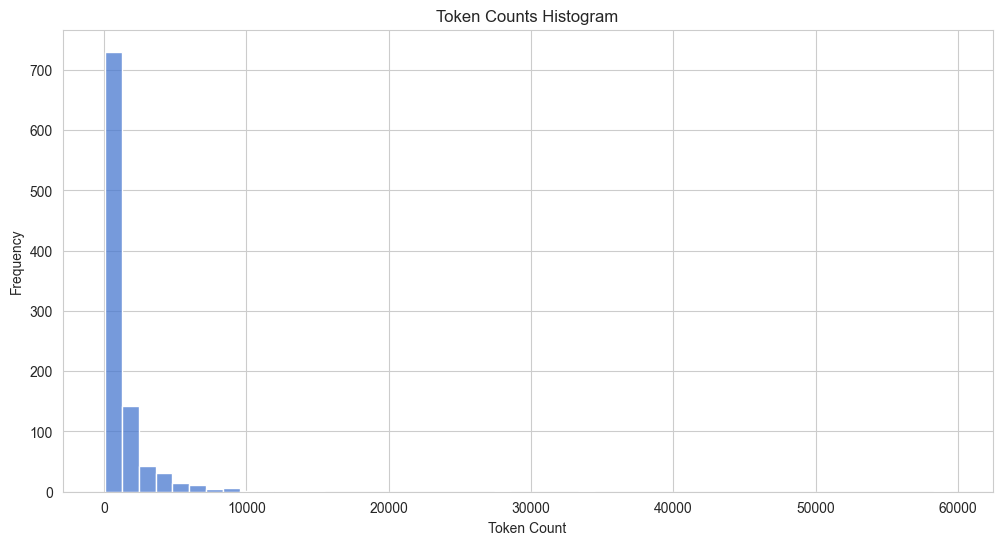

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [51]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,
    length_function=tiktoken_len,
    separators=["\n\n", "\n", " ", ""]
)

In [52]:
chunks = text_splitter.split_text(docs[0].page_content)
len(chunks)

3

In [56]:
tiktoken_len(chunks[0]), tiktoken_len(chunks[1]), tiktoken_len(chunks[2])

(356, 374, 357)

In [60]:
chunks

['.rst\n.pdf\nWelcome to LangChain\n Contents \nGetting Started\nModules\nUse Cases\nReference Docs\nEcosystem\nAdditional Resources\nWelcome to LangChain#\nLangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model, but will also be:\nData-aware: connect a language model to other sources of data\nAgentic: allow a language model to interact with its environment\nThe LangChain framework is designed around these principles.\nThis is the Python specific portion of the documentation. For a purely conceptual guide to LangChain, see here. For the JavaScript documentation, see here.\nGetting Started#\nHow to get started using LangChain to create an Language Model application.\nQuickstart Guide\nConcepts and terminology.\nConcepts and terminology\nTutorials created by community experts and presented on YouTube.\nTutorials\nModules#\nThese modules are the core abstr

In [72]:
import hashlib
md5 = hashlib.md5()

url = docs[0].metadata["source"].replace("rtdocs/", "https://")
print(url)

md5.update(url.encode("utf-8"))
uid = md5.hexdigest()[:12]
print(uid)

https://python.langchain.com/en/latest/index.html
39df1f03071c


In [91]:
from pprint import pprint

data = [
    {
        "id": f"{uid}-{index}",
        "text": chunk[:10], #chunk,
        "source": docs[0].metadata["source"].replace("rtdocs/", "https://")
    }
    for index, chunk in enumerate(chunks)
]
pprint(data)

[{'id': '39df1f03071c-0',
  'source': 'https://python.langchain.com/en/latest/index.html',
  'text': '.rst\n.pdf\n'},
 {'id': '39df1f03071c-1',
  'source': 'https://python.langchain.com/en/latest/index.html',
  'text': 'Agents: An'},
 {'id': '39df1f03071c-2',
  'source': 'https://python.langchain.com/en/latest/index.html',
  'text': 'Reference '}]


In [92]:
len(docs)

993

In [95]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
    url = doc.metadata["source"].replace("rtdocs/", "https://")
    md5.update(url.encode("utf-8"))
    uid = md5.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for index, chunk in enumerate(chunks):
        documents.append({
            "id": f"{uid}-{index}",
            "source": url,
            "text": chunk,
        })

len(documents)

100%|██████████| 993/993 [00:02<00:00, 333.43it/s]


4333

In [96]:
documents[0]

{'id': '3091316777ae-0', 'source': 'https://python.langchain.com/en/latest/index.html', 'text': '.rst\n.pdf\nWelcome to LangChain\n Contents \nGetting Started\nModules\nUse Cases\nReference Docs\nEcosystem\nAdditional Resources\nWelcome to LangChain#\nLangChain is a framework for developing applications powered by language models. We believe that the most powerful and differentiated applications will not only call out to a language model, but will also be:\nData-aware: connect a language model to other sources of data\nAgentic: allow a language model to interact with its environment\nThe LangChain framework is designed around these principles.\nThis is the Python specific portion of the documentation. For a purely conceptual guide to LangChain, see here. For the JavaScript documentation, see here.\nGetting Started#\nHow to get started using LangChain to create an Language Model application.\nQuickstart Guide\nConcepts and terminology.\nConcepts and terminology\nTutorials created by com

In [98]:
import json

with open("train.jsonl", "w") as f:
    for doc in documents:
        f.write(json.dumps(doc) + "\n")

In [100]:
documents = []

with open("train.jsonl", "r") as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

4333

In [105]:
from datasets import load_dataset

documents = load_dataset('prasanth-balaraman/langchain-docs')
documents

Found cached dataset json (/Users/jeevagayathri/.cache/huggingface/datasets/prasanth-balaraman___json/prasanth-balaraman--langchain-docs-2e96d3e9fcb96e50/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
100%|██████████| 1/1 [00:00<00:00, 492.12it/s]


DatasetDict({
    train: Dataset({
        features: ['id', 'source', 'text'],
        num_rows: 4333
    })
})

DatasetDict({
    train: Dataset({
        features: ['id', 'source', 'text'],
        num_rows: 4333
    })
})